In [1]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append("../..")
sys.path.append(".")

from plot_results_for_paper import (
    plot_combined_benchmark_result_table,
    rc_context_wrapper,
    select_columns,
)
from plot_config import style_dict
import pickle
import matplotlib.pyplot as plt
from plot_config_for_paper import FIGSIZE_2COL

In [2]:
with open("gen_time_mem_data.p", "rb") as f:
    raw_data = pickle.load(f)

gen_mem_df = raw_data["gen_mem_gb"]
gen_time_df = raw_data["gen_time_seconds"]

## Final Plots - All results

In [3]:
selected_columns_runtime = {
    "llama3": "R--llama3__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False",
    "llama2": "R--llama2__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False",
    "falcon_mamba": "R--falcon_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True",
    "codestral_mamba": "R--codestral_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True",
    "xlstm": "R--xlstm__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True_isd-bfloat16_ed-4096_nh-8_nb-32_vs-50304_wm-fused_ck-chunkwise--triton_xl_chunk_sk-native_sequence__triton_step_fused_sk-triton_fused_cs-128_akd-bfloat16",
}
selected_columns_memory = {
    "llama2": "M--llama2__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False",
    "llama3": "M--llama3__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-False",
    "falcon_mamba": "M--falcon_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True",
    "codestral_mamba": "M--codestral_mamba__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True",
    "xlstm": "M--xlstm__tcm__ampdt-bfloat16__wdt-bfloat16__ucgg-False_ucgm-True_isd-bfloat16_ed-4096_nh-8_nb-32_vs-50304_wm-fused_ck-chunkwise--triton_xl_chunk_sk-native_sequence__triton_step_fused_sk-triton_fused_cs-128_akd-bfloat16",
}
filename_suffix = ""
add_legend = True

In [4]:
gen_time_plot_df = select_columns(
    gen_time_df, selected_columns_runtime, keep_col_regex=".*generation.*"
)

In [5]:
gen_mem_plot_df = select_columns(
    gen_mem_df, selected_columns_memory, keep_col_regex=".*generation.*"
)

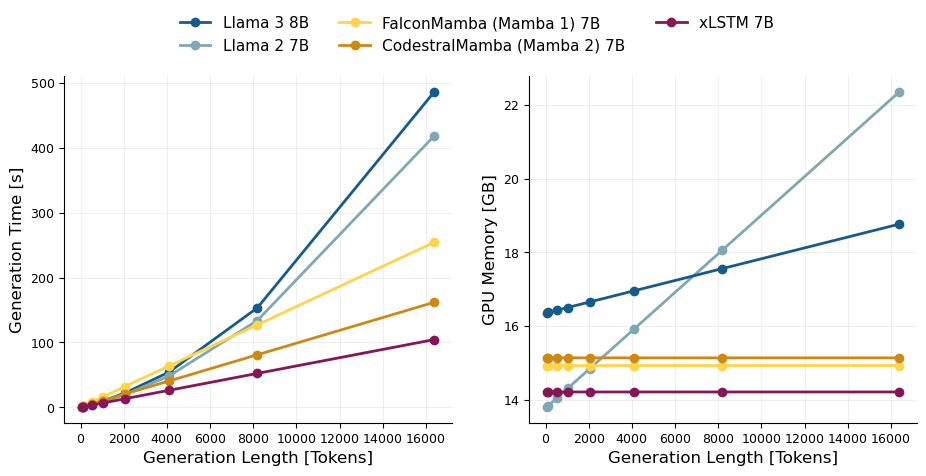

In [6]:
fig = rc_context_wrapper(
    func=plot_combined_benchmark_result_table,
    result_dfs=[gen_time_plot_df, gen_mem_plot_df],
    x_axis_param="generation_length",
    # linestyle_mapping=linestyle_mapping,
    style_dict=style_dict,
    style_dict_colname_mapping_exact=False,
    y_labels=["Generation Time [s]", "GPU Memory [GB]"],
    x_label="Generation Length [Tokens]",
    title="",  # "Time to generate 100 tokens, for varying prefill lengths",
    figsize=FIGSIZE_2COL,  # (1.3 * 12 * 2.1 / 2.54, 1.5 * 8 * 1 / 2.54),
    filename=f"paper-combined_generation_time_and_generation_memory{filename_suffix}",
    add_legend=True,  # add_legend,
    legend_args={
        "loc": "lower center",
        "ncol": 3,
        "bbox_to_anchor": (0.0, 0.90, 1.0, 0.502),
        "frameon": False,
        "facecolor": "white",
    },
)
plt.show()